In [2]:
import math 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats._discrete_distns import binom

Given a binary random variable X $\in$ {0,1} first we need to generate random samples using Monte Carlo Simulation. Details description is in the sheet. 

In [3]:
N = [50,100,150,200] # Array of number of samples need to be generated 
theta = 0.4          # theta = P[X=1] = 0.4 (given)
sample_dict = {}

def generate_samples(n, theta):
    sample = []
    region = [0,1]
    for i in range(n):
        x = np.random.uniform(low=0.0, high=1.0)
        if 0<= x <theta :
            sample.append(region[1])
        else:
            sample.append(region[0])
    return(sample)

# Generating the samples N = [50,100,150,200]

In [8]:
for i in N:
    sample_dict[i] = generate_samples(i, theta)
    
print(sample_dict)

{50: [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], 100: [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1], 150: [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], 200: [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1

# Finding theta_mle for each sample size    

In [9]:
mle_dict = {}
for i in N:
    mle_dict[i] = sum(sample_dict[i])/i
print(mle_dict)

{50: 0.42, 100: 0.43, 150: 0.44, 200: 0.39}


# Bernouli Confidence Interval using approximation using 95% confidence

The confidience interval is $Z_{\frac{1+\alpha}{2}} \times \sqrt{(\theta \times (1-\theta)/N)}$

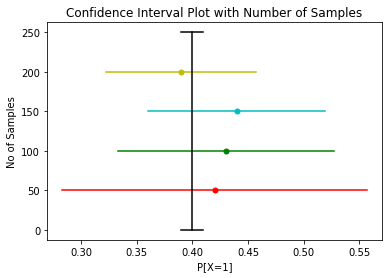

In [10]:
Z_95 = stats.norm.ppf((1+0.95)/2, 0,1)
conf_dict_norm = {}
lower_conf = []
upper_conf = []

for i in N:
    theta_hat = mle_dict[i] 
    conf_dict_norm[i] = [theta_hat - Z_95 * math.sqrt(theta_hat * (1-theta_hat)/i) , theta_hat + Z_95 * math.sqrt(theta_hat * (1-theta_hat)/i)]
    lower_conf.append(theta_hat - Z_95 * math.sqrt(theta_hat * (1-theta_hat)/i))
    upper_conf.append(theta_hat + Z_95 * math.sqrt(theta_hat * (1-theta_hat)/i))
    
colors = ['r', 'g', 'c', 'y']

for i in range(len(N)):
    plt.plot([lower_conf[i], upper_conf[i]],[N[i], N[i]], color = colors[i])
    plt.plot(mle_dict[N[i]], N[i], marker="o", markersize=5, color = colors[i])
plt.plot([theta,theta], [0, 250], color = 'black')
plt.plot([theta - 0.01, theta + 0.01], [250,250], color = 'black')
plt.plot([theta - 0.01, theta + 0.01], [0,0], color = 'black')
plt.title('Confidence Interval Plot with Number of Samples')
plt.xlabel('P[X=1]')
plt.ylabel('No of Samples')
plt.show()

# Exact confidence interval (source code from scipy github) 

In [11]:
def _findp(func):
    try:
        p = brentq(func, 0, 1)
    except RuntimeError:
        raise RuntimeError('numerical solver failed to converge when '
                           'computing the confidence limits') from None
    except ValueError as exc:
        raise ValueError('brentq raised a ValueError; report this to the '
                         'SciPy developers') from exc
    return p


def binom_exact_conf_int(k, n, confidence_level, alternative):
    """
    Compute the estimate and confidence interval for the binomial test.
    Returns proportion, prop_low, prop_high
    """
    if alternative == 'two-sided':
        alpha = (1 - confidence_level) / 2
        if k == 0:
            plow = 0.0
        else:
            plow = _findp(lambda p: binom.sf(k-1, n, p) - alpha)
        if k == n:
            phigh = 1.0
        else:
            phigh = _findp(lambda p: binom.cdf(k, n, p) - alpha)
    elif alternative == 'less':
        alpha = 1 - confidence_level
        plow = 0.0
        if k == n:
            phigh = 1.0
        else:
            phigh = _findp(lambda p: binom.cdf(k, n, p) - alpha)
    elif alternative == 'greater':
        alpha = 1 - confidence_level
        if k == 0:
            plow = 0.0
        else:
            plow = _findp(lambda p: binom.sf(k-1, n, p) - alpha)
        phigh = 1.0
    return(plow, phigh)


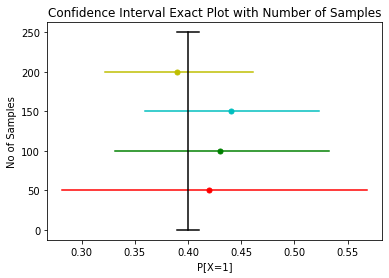

In [12]:
conf_dict_exact = {}
lower_conf_exact = []
upper_conf_exact = []

for i in N:
    low, high = binom_exact_conf_int(sum(sample_dict[i]),i, 0.95, alternative = 'two-sided')
    conf_dict_exact[i] = [low, high]
    lower_conf_exact.append(low)
    upper_conf_exact.append(high)
    
colors = ['r', 'g', 'c', 'y']

for i in range(len(N)):
    plt.plot([lower_conf_exact[i], upper_conf_exact[i]],[N[i], N[i]], color = colors[i])
    plt.plot(mle_dict[N[i]], N[i], marker="o", markersize=5, color = colors[i])
plt.plot([theta,theta], [0, 250], color = 'black')
plt.plot([theta - 0.01, theta + 0.01], [250,250], color = 'black')
plt.plot([theta - 0.01, theta + 0.01], [0,0], color = 'black')
plt.title('Confidence Interval Exact Plot with Number of Samples')
plt.xlabel('P[X=1]')
plt.ylabel('No of Samples')
plt.show()   

## Observations 

After plotting the confidence intervals with respect to the sample size, for both the cases approximate and the exact one, the confidece interval is getting smaller if the sample size increases. Infact the sample mean is also close to the true mean when the sample size is large. this supports the statement for Law of Large numbers. More number of samples provides better estimates for mean. 

# Comparison of tightness

For Approximate bounds

In [13]:
interval_normal = []
for i in range(len(upper_conf)):
    interval_normal.append(upper_conf[i] - lower_conf[i]) 
interval_normal

[0.2736098490509563,
 0.19406612862136757,
 0.15887399228479004,
 0.13519490030641923]

For Exact bounds

In [14]:
interval_exact = []
for i in range(len(upper_conf_exact)):
    interval_exact.append(upper_conf_exact[i] - lower_conf_exact[i]) 
interval_exact

[0.28605732381074533,
 0.20147524504376574,
 0.16414794980684966,
 0.1393301704299213]

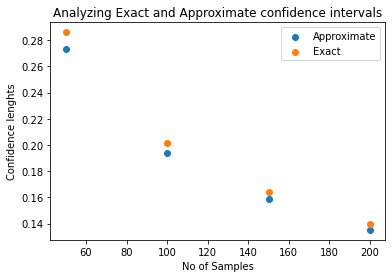

In [19]:
plt.scatter(N, interval_normal, label = 'Approximate')
plt.scatter(N, interval_exact, label = 'Exact')
plt.legend()
plt.title('Analyzing Exact and Approximate confidence intervals')
plt.xlabel('No of Samples')
plt.ylabel('Confidence lenghts')
plt.show()

From this graph we can see that Exact methods for estimating confidence intervals is less strict than the Normal approximate one. This is because, for approximate case, the distribution of the test statistic, then the interval is approximate. This often fail to let us know the exact distribution of the test statistic when the assumptions involved in the setup are not met.